Importing Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

Importing the files and Preprocessing

In [6]:
train_dir = 'seg_train'
test_dir = 'seg_test'

# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# 1. Dataset Overview:

    Visualize a few samples from the dataset, displaying their corresponding labels.

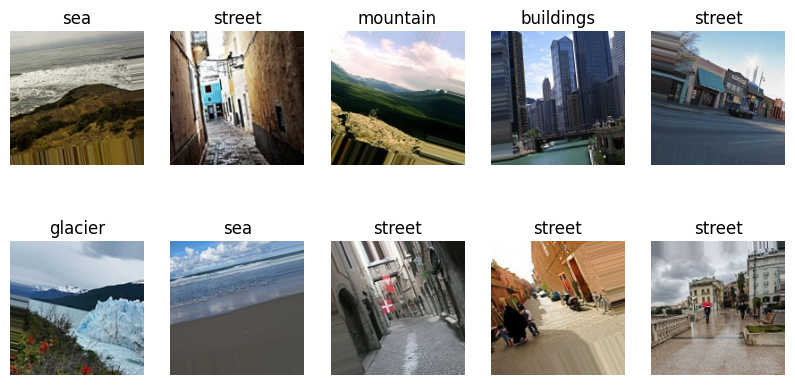

In [7]:
# Visualizing some images and their labels
class_labels = list(train_generator.class_indices.keys())
images, labels = next(train_generator)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_labels[np.argmax(labels[i])])
    plt.axis('off')
plt.show()

# 2. Model Architecture:

    Design a CNN model with at least 3 convolutional layers, followed by pooling layers and fully connected (dense) layers.

    Experiment with different kernel sizes, activation functions (such as ReLU), and pooling strategies (max-pooling or average pooling).

    Implement batch normalization and dropout techniques to improve the generalization of your model.

In [9]:
# Model creation with the required experiments
model = Sequential()

# First convolutional block with kernel size (3, 3) and ReLU
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max Pooling
model.add(BatchNormalization())

# Second convolutional block with kernel size (5, 5) and ReLU
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))  # Average Pooling for experimentation
model.add(BatchNormalization())

# Third convolutional block with kernel size (7, 7) and Tanh
model.add(Conv2D(128, (7, 7), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max Pooling
model.add(BatchNormalization())

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))  # Fully connected layer with ReLU
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(6, activation='softmax'))  # 6 classes for classification

In [10]:
# Model summary to verify architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 70, 70, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 35, 35, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 35, 35, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,303,238 (50.75 MB)

 Trainable params: 13,302,790 (50.75 MB)

 Non-trainable params: 448 (1.75 KB)

# 3. Model Training:

    Split the dataset into training and test sets.

    Compile the model using an appropriate loss function (categorical cross-entropy) and an optimizer (such as Adam or SGD).

    Train the model for a sufficient number of epochs, monitoring the training and validation accuracy.

The dataset was already split into training and testing data.

In [13]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(train_generator, 
                    epochs=10, 
                    validation_data=test_generator)

Epoch 1/10


c:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 235s 527ms/step - accuracy: 0.4034 - loss: 11.1481 - val_accuracy: 0.4890 - val_loss: 2.6441
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 262s 593ms/step - accuracy: 0.5393 - loss: 1.7639 - val_accuracy: 0.6210 - val_loss: 1.0955
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 247s 560ms/step - accuracy: 0.5935 - loss: 1.0911 - val_accuracy: 0.6760 - val_loss: 0.8952
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 310s 703ms/step - accuracy: 0.6331 - loss: 0.9895 - val_accuracy: 0.7023 - val_loss: 0.7973
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 270s 612ms/step - accuracy: 0.6381 - loss: 0.9830 - val_accuracy: 0.7560 - val_loss: 0.7137
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 251s 570ms/step - accuracy: 0.6699 - loss: 0.9164 - val_accuracy: 0.7020 - val_loss: 0.8561
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 279s 632ms/step - accuracy: 0.6589 - loss: 0.9336 - val_accuracy: 0.7050 - val_loss: 0.8031
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 263s 595ms/step - accuracy: 0.6626 - loss: 0.9

# 4. Evaluation:
    Evaluate the trained model on the test set and report the accuracy.

    Plot the training and validation accuracy/loss curves to visualize the model's performance.
    
    Display the confusion matrix for the test set to analyze misclassified samples.

94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.6466 - loss: 0.9615
Test Accuracy: 0.6453333497047424


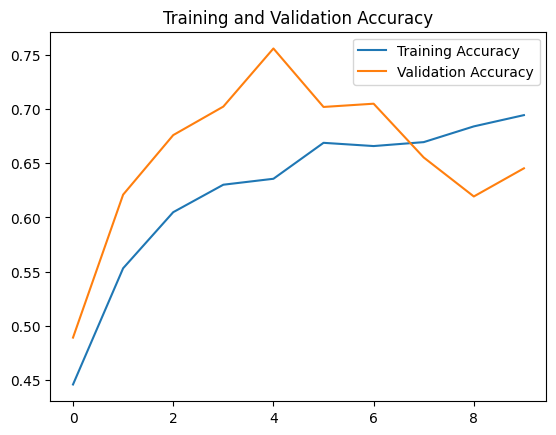

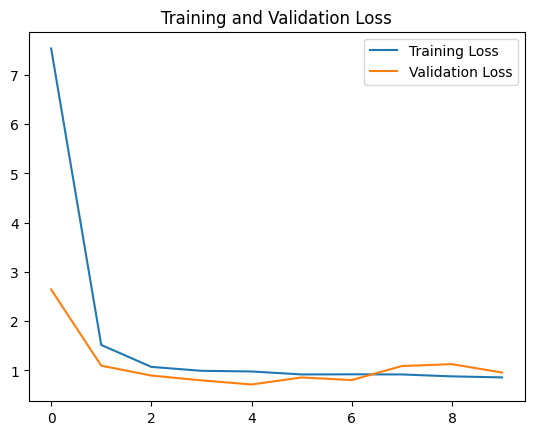

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

The training accuracy steadily increases over time, indicating that the model is learning from the training data and improving its ability to make correct predictions. However, the rate of increase slows down after a few epochs, suggesting that the model is approaching its capacity to learn from the training data.Initially, the validation accuracy also increases, showing that the model generalizes well to unseen data (validation set) during the first few epochs. However, around epoch 5, the validation accuracy peaks and starts decreasing. It suggests that the model is starting to overfit after epoch 5

94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step


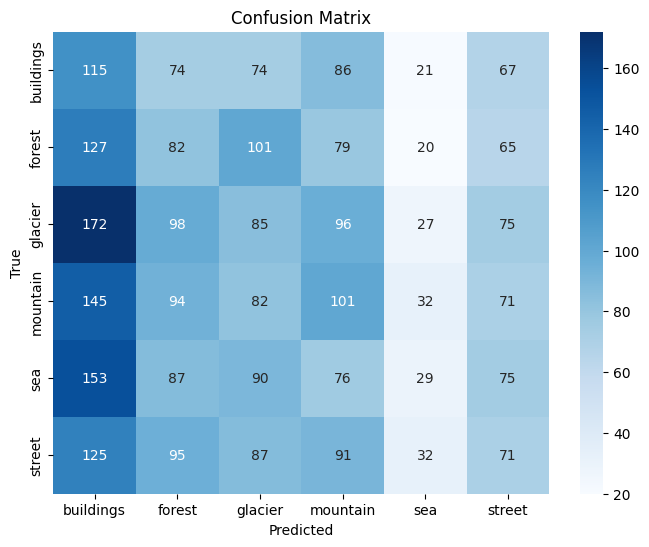

              precision    recall  f1-score   support

   buildings       0.14      0.26      0.18       437
      forest       0.15      0.17      0.16       474
     glacier       0.16      0.15      0.16       553
    mountain       0.19      0.19      0.19       525
         sea       0.18      0.06      0.09       510
      street       0.17      0.14      0.15       501

    accuracy                           0.16      3000
   macro avg       0.17      0.16      0.16      3000
weighted avg       0.17      0.16      0.16      3000



In [16]:
# Confusion Matrix + Classification Report

# Predictions and confusion matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optional: Print classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# 5. Optimization :
    Experiment with data augmentation techniques (rotation, flipping, zooming) to further improve the model’s performance.
    
    Fine-tune hyperparameters like learning rate, batch size, and the number of filters in each layer.

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


c:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


c:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 269s 606ms/step - accuracy: 0.4976 - loss: 1.7973 - val_accuracy: 0.4677 - val_loss: 2.0650
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 239s 544ms/step - accuracy: 0.6043 - loss: 1.2504 - val_accuracy: 0.6887 - val_loss: 0.9520
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 3261s 7s/step - accuracy: 0.6342 - loss: 1.1011 - val_accuracy: 0.7220 - val_loss: 0.7797
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 596s 1s/step - accuracy: 0.6614 - loss: 0.9978 - val_accuracy: 0.7023 - val_loss: 1.0181
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 1423s 3s/step - accuracy: 0.6906 - loss: 0.8895 - val_accuracy: 0.7433 - val_loss: 0.8360
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 226ms/step - accuracy: 0.7245 - loss: 0.8539
Test Accuracy after tuning: 0.7433333396911621


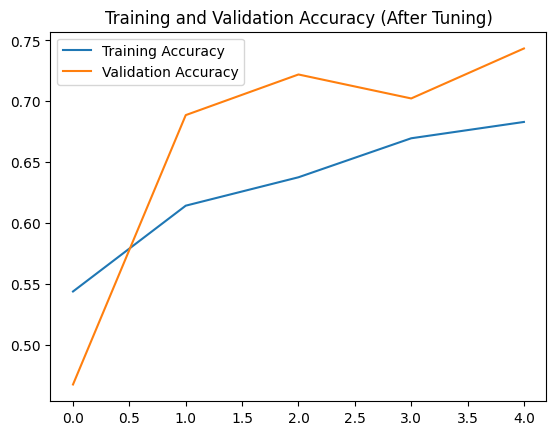

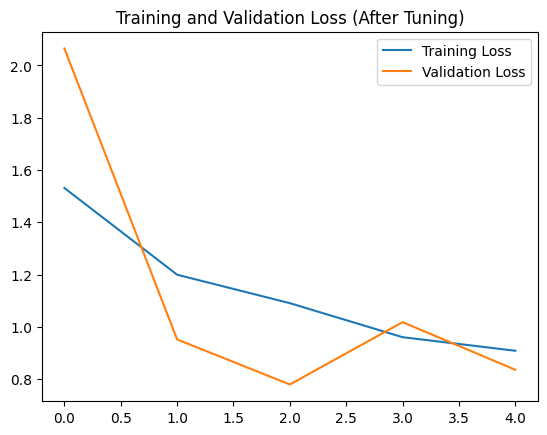

In [17]:
# Defining the hyperparameters to be tuned
learning_rate = 0.0001  
batch_size = 32  
epochs = 5  
filters = [32, 64, 128]  

# Data augmentation: trying different augmentation strategies
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,  
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Model Optimization: Hyperparameters tuned
model = Sequential()

# First convolutional block (3x3 kernel) with hyperparameter tuning
model.add(Conv2D(filters[0], (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Second convolutional block (5x5 kernel)
model.add(Conv2D(filters[1], (5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Third convolutional block (7x7 kernel)
model.add(Conv2D(filters[2], (7, 7), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Reduced number of neurons for quicker training
model.add(Dropout(0.4))  # Adjusted Dropout rate
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compile the model with a fine-tuned learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with fewer epochs for demonstration
history = model.fit(train_generator,
                    epochs=epochs,  # Fewer epochs for faster demonstration
                    validation_data=test_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy after tuning: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (After Tuning)')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (After Tuning)')
plt.legend()
plt.show()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 236s 531ms/step - accuracy: 0.4856 - loss: 2.4445 - val_accuracy: 0.5867 - val_loss: 1.8961
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 200s 454ms/step - accuracy: 0.6033 - loss: 1.8948 - val_accuracy: 0.7017 - val_loss: 1.6286
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 201s 456ms/step - accuracy: 0.6332 - loss: 1.7685 - val_accuracy: 0.7353 - val_loss: 1.4827
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 197s 447ms/step - accuracy: 0.6704 - loss: 1.6185 - val_accuracy: 0.7593 - val_loss: 1.3469
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 202s 458ms/step - accuracy: 0.6729 - loss: 1.5469 - val_accuracy: 0.7627 - val_loss: 1.4161
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 198s 450ms/step - accuracy: 0.6917 - loss: 1.5042 - val_accuracy: 0.7633 - val_loss: 1.3495
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 200s 455ms/step - accuracy: 0.6899 - loss: 1.4657 - val_accuracy: 0.7730 - val_loss

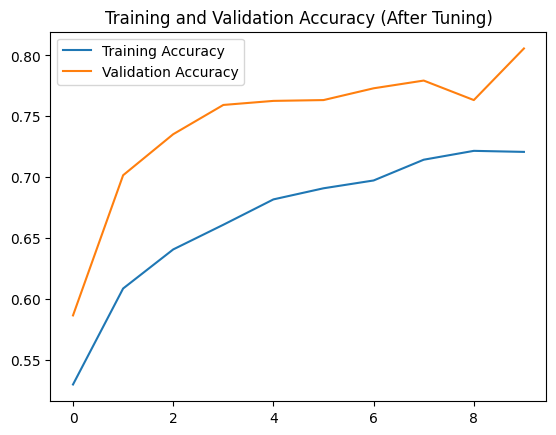

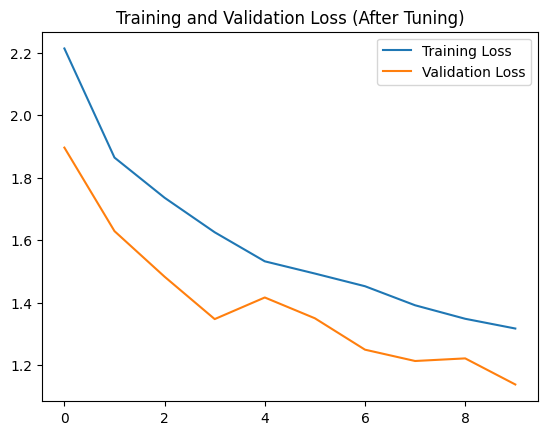

In [22]:
# Defining the hyperparameters to be tuned
learning_rate = 0.0001  
batch_size = 32  
epochs = 10  # Increased epochs for better training, but can stop early
filters = [32, 64, 128]  

# Data augmentation: trying different augmentation strategies
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,  
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Model Optimization: Hyperparameters tuned
model = Sequential()

# First convolutional block (3x3 kernel) with hyperparameter tuning
model.add(Conv2D(filters[0], (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Second convolutional block (5x5 kernel)
model.add(Conv2D(filters[1], (5, 5), activation='relu', kernel_regularizer=l2(0.001)))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Third convolutional block (7x7 kernel)
model.add(Conv2D(filters[2], (7, 7), activation='tanh', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))  # Added L2 regularization
model.add(Dropout(0.4))  # Adjusted Dropout rate
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compile the model with a fine-tuned learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implementing early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with fewer epochs for demonstration, using early stopping
history = model.fit(train_generator,
                    epochs=epochs,  # Can train longer but early stopping will manage it
                    validation_data=test_generator,
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy after tuning: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (After Tuning)')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (After Tuning)')
plt.legend()
plt.show()

Accuracy has increased.